In [ ]:
# -----------------------------
# 1. Import Libraries & Load Data
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
file_path = "crime_data_cleaned.csv"
crime_df = pd.read_csv("crime_data_cleaned.csv")

# Preview
crime_df.head()


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes


In [5]:
# -----------------------------
# 2. Convert Dates & Extract Features
# -----------------------------
# Convert dates to datetime
crime_df['Date Reported'] = pd.to_datetime(crime_df['Date Reported'], errors='coerce')
crime_df['Date of Occurrence'] = pd.to_datetime(crime_df['Date of Occurrence'], errors='coerce')
crime_df['Time of Occurrence'] = pd.to_datetime(crime_df['Time of Occurrence'], errors='coerce')

# Extract features
crime_df['Year'] = crime_df['Date of Occurrence'].dt.year
crime_df['Month'] = crime_df['Date of Occurrence'].dt.month
crime_df['Day'] = crime_df['Date of Occurrence'].dt.day
crime_df['Weekday'] = crime_df['Date of Occurrence'].dt.day_name()
crime_df['Hour'] = crime_df['Time of Occurrence'].dt.hour

crime_df[['Date of Occurrence', 'Year', 'Month', 'Day', 'Weekday', 'Hour']].head()


,Date of Occurrence,Year,Month,Day,Weekday,Hour
0,2020-01-01 00:00:00,2020,1,1,Wednesday,1.0
1,2020-01-01 01:00:00,2020,1,1,Wednesday,6.0
2,2020-01-01 02:00:00,2020,1,1,Wednesday,14.0
3,2020-01-01 03:00:00,2020,1,1,Wednesday,14.0
4,2020-01-01 04:00:00,2020,1,1,Wednesday,16.0


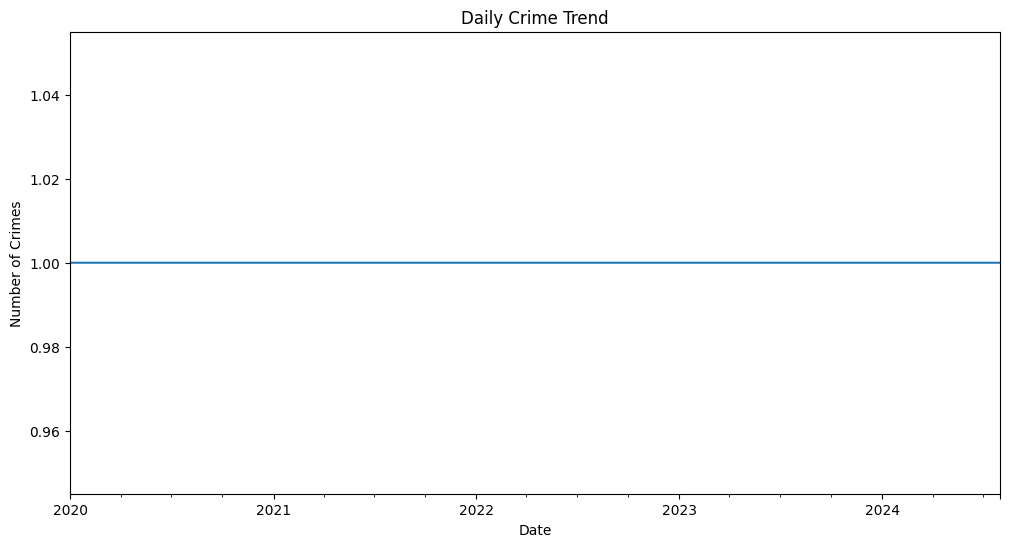

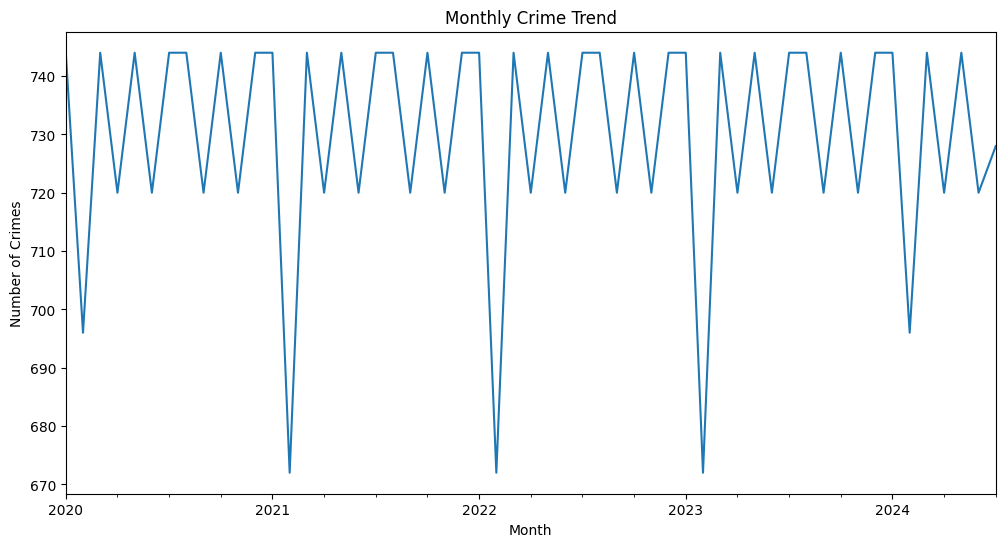

In [13]:
# -----------------------------
# 3. Trend Over Time (Daily, Monthly)
# -----------------------------
# Daily crime count
daily_trend = crime_df.groupby('Date of Occurrence').size()

plt.figure(figsize=(12,6))
daily_trend.plot()
plt.title("Daily Crime Trend")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.show()

# Monthly crime count
monthly_trend = crime_df.groupby(crime_df['Date of Occurrence'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
monthly_trend.plot()
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


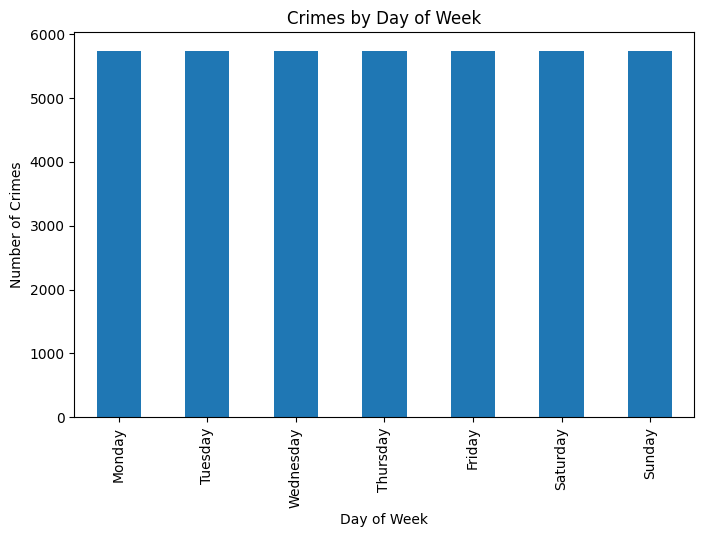

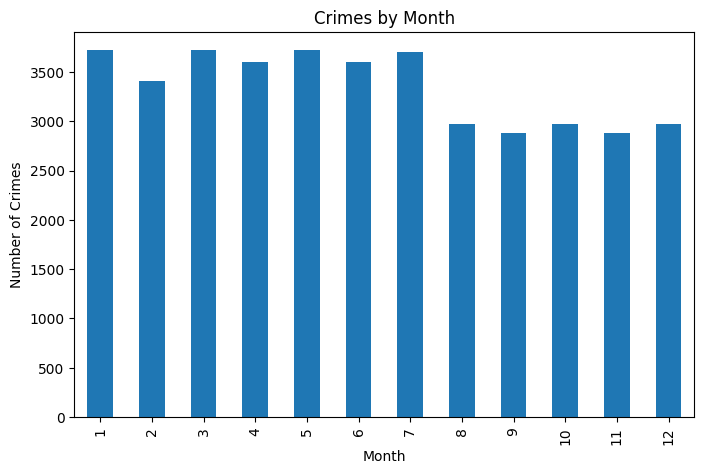

In [7]:
# -----------------------------
# 4. Seasonality (Weekday & Monthly Patterns)
# -----------------------------
# Crimes by day of week
weekday_counts = crime_df['Weekday'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(8,5))
weekday_counts.plot(kind='bar')
plt.title("Crimes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()

# Crimes by month
month_counts = crime_df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,5))
month_counts.plot(kind='bar')
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


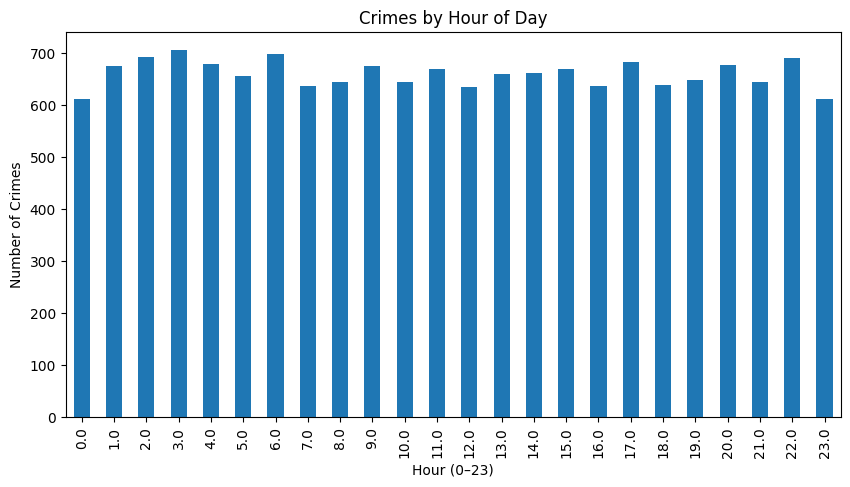

In [ ]:
# -----------------------------
# 5. Time of Day Analysis
# -----------------------------
hourly_counts = crime_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar')
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Crimes")
plt.show()


<Figure size 1400x700 with 0 Axes>

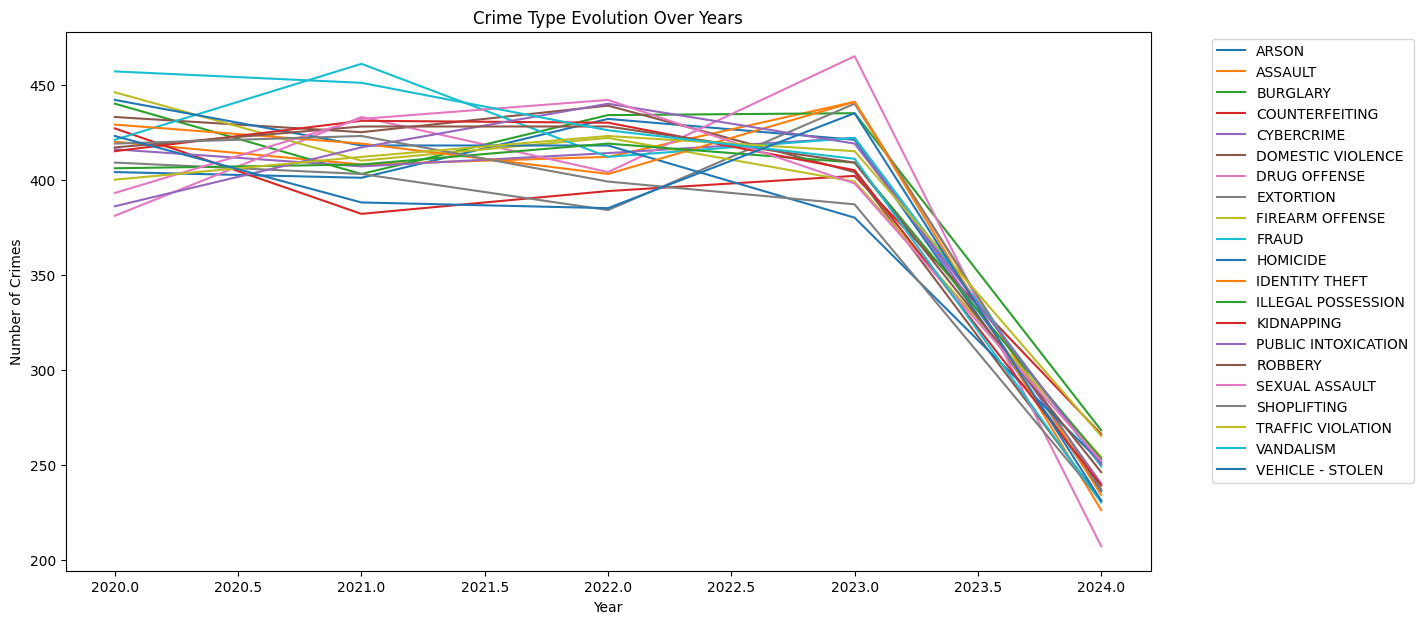

In [9]:
# -----------------------------
# 6. Crime Type Evolution Over Years
# -----------------------------
crime_type_trend = crime_df.groupby(['Year','Crime Description']).size().unstack(fill_value=0)

plt.figure(figsize=(14,7))
crime_type_trend.plot(figsize=(14,7))
plt.title("Crime Type Evolution Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

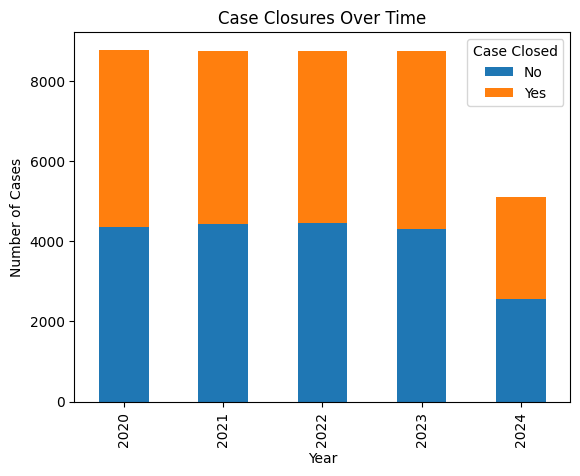

In [10]:
# -----------------------------
# 7. Case Closure Over Time
# -----------------------------
closure_trend = crime_df.groupby(['Year','Case Closed']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
closure_trend.plot(kind='bar', stacked=True)
plt.title("Case Closures Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()


In [11]:
# -----------------------------
# 8. Forecasting Setup (Optional)
# -----------------------------
# Aggregate daily data
crime_daily = crime_df.groupby('Date of Occurrence').size().reset_index(name='Crime Count')

# Rename columns for Prophet (if you want to use it)
crime_daily = crime_daily.rename(columns={'Date of Occurrence':'ds', 'Crime Count':'y'})

crime_daily.head()


,ds,y
0,2020-01-01 00:00:00,1
1,2020-01-01 01:00:00,1
2,2020-01-01 02:00:00,1
3,2020-01-01 03:00:00,1
4,2020-01-01 04:00:00,1
